In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, Y_train),(X_test, Y_test)=keras.datasets.mnist.load_data()
X_train.shape, X_test.shape

11490434/11490434 [==============================] - 3s 0us/step


((60000, 28, 28), (10000, 28, 28))

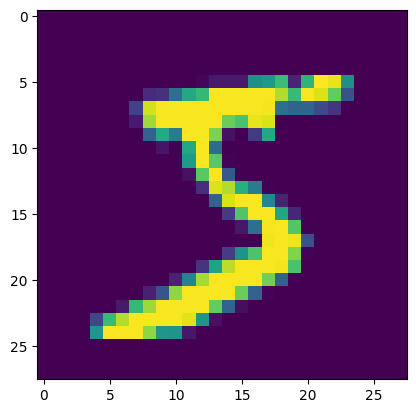

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [4]:
X_train=X_train/255
X_test=X_test/255

In [52]:
model =Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               200960    
                                                                 
 dense_32 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [55]:
history= model.fit(X_train,Y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2506 - accuracy: 0.9280 - val_loss: 0.1437 - val_accuracy: 0.9577
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1024 - accuracy: 0.9696 - val_loss: 0.1055 - val_accuracy: 0.9665
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0670 - accuracy: 0.9797 - val_loss: 0.0862 - val_accuracy: 0.9726
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0968 - val_accuracy: 0.9703
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0785 - val_accuracy: 0.9768
Epoch 6/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0822 - val_accuracy: 0.9774
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0823 - val_accuracy:

In [56]:
pred= model.predict(X_test)
pred= pred.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)

0.9791

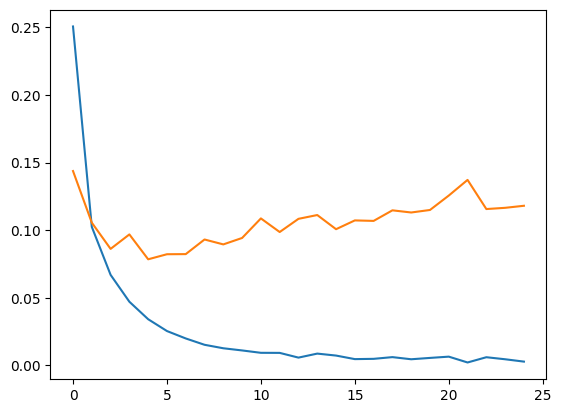

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

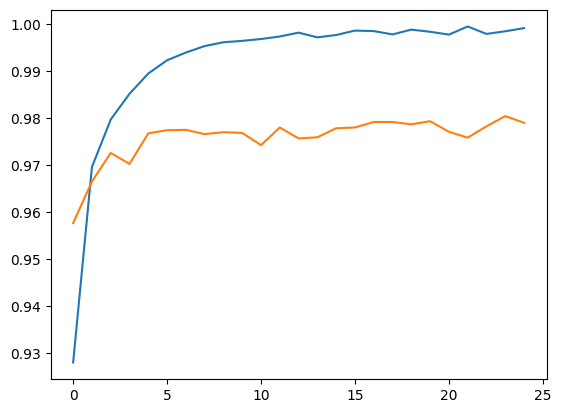

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])